In [1]:
from math import sqrt, pi, log, exp, floor
import matplotlib.pyplot as plt
import numpy as np
np.__version__
np.set_printoptions(suppress=True)

各电缆间距函数

In [36]:
def cal_dis(row, column, typeCircuit, S1, S2, S3, GMRs, rowLength, columnLength):
    numberCircuit = row * column  # 回路个数，n
    numberCable = 3 * numberCircuit  # 电缆数目，3×n
    coorCable = np.zeros((numberCable, 2))  # 电缆坐标，以第一根电缆为原点，向上和左为正方向
    
    fig, ax = plt.subplots()
    plt.title('Coor Cable') 
    plt.xlabel('X')  
    plt.ylabel('Y')  
    for i in range(row):  # 行 matlab下标从1开始，numpy下标从0开始
        for j in range(column):  # 列
            temp1 = i * column + j  # 第几个回路
            temp2 = temp1 * 3  # 该回路的第一根电缆，上或者中间
            if typeCircuit[temp1, 0] == 1:  # 对于三角形排列
                coorCable[temp2, 0] = np.sum(rowLength[0:j])
                coorCable[temp2, 1] = np.sum(columnLength[0:i])  
                coorCable[temp2 + 1, 0] = coorCable[temp2, 0] - 0.5 * S2
                coorCable[temp2 + 1, 1] = coorCable[temp2, 1] - sqrt(S1**2 - (0.5 * S2)**2)
                coorCable[temp2 + 2, 0] = coorCable[temp2, 0] + 0.5 * S2
                coorCable[temp2 + 2, 1] = coorCable[temp2, 1] - sqrt(S1**2 - (0.5 * S2)**2)
            else:
                coorCable[temp2, 0] = np.sum(rowLength[0:j])
                coorCable[temp2, 1] = np.sum(columnLength[0:i])
                coorCable[temp2 + 1, 0] = coorCable[temp2, 0] - S3
                coorCable[temp2 + 1, 1] = coorCable[temp2, 1]
                coorCable[temp2 + 2, 0] = coorCable[temp2, 0] + S3
                coorCable[temp2 + 2, 1] = coorCable[temp2, 1]
            ax.annotate('A', xy=coorCable[temp2])
            ax.annotate('B', xy=coorCable[temp2+1])
            ax.annotate('C', xy=coorCable[temp2+2])
            x = np.append(coorCable[temp2:temp2 + 3,0],coorCable[temp2, 0])
            y = np.append(coorCable[temp2:temp2 + 3,1],coorCable[temp2, 1])
            ax.plot(x,y, '-')
    ax.plot(coorCable[:,0],coorCable[:,1], 'o')    
    plt.show()
    print('coorCable', coorCable)
    distance = np.zeros((numberCable, numberCable))

    for i in range(numberCable):
        for j in range(numberCable):
            if i != j:
                distance[i, j] = sqrt((coorCable[i, 0] - coorCable[j, 0])**2 +
                                      (coorCable[i, 1] - coorCable[j, 1])**2)
            else:
                distance[i, j] = GMRs

    return distance

初始化参数

In [37]:
row = 2  # 回路排列的行数
column = 2  # 回路排列的列数
numberCircuit = row * column  # 回路个数，n
numberCable = 3 * numberCircuit  # 电缆总数目，3×n

# 各回路的类型(列向量,三角型输入1，直线型输入2)
typeCircuit = np.ones((numberCircuit, 1), dtype=int)  # [1;1;1;1]

Di = 92.8 # 电缆金属护套内直径/mm
Do = 97.6 # 电缆金属护套外直径/mm
S1 = 302  # 回路内三角形腰长，或直线型相邻电缆间距/mm
S2 = 207  # 三角形底长/mm
S3 = 540  # 一字型回路内相邻相之间的距离/mm
GMRs = sqrt(Di*Do)/2  # 电缆的金属护套的几何平均半径，/mm,可用护套的内外径的平均值代替

R1 = 1  # 一端口接地电阻/Ω
R2 = 10  # 二端口接地电阻/Ω
EarthResistivity = 200  # 大地电阻率/Ω*m
RSheathUint = 0.2076  # 护套单位电阻/Ω/km

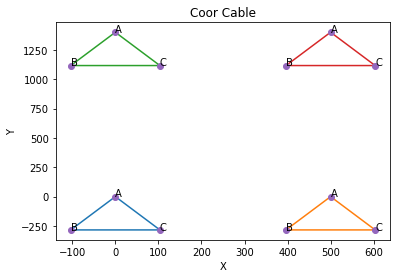

coorCable [[   0.           0.       ]
 [-103.5       -283.7106801]
 [ 103.5       -283.7106801]
 [ 500.           0.       ]
 [ 396.5       -283.7106801]
 [ 603.5       -283.7106801]
 [   0.        1400.       ]
 [-103.5       1116.2893199]
 [ 103.5       1116.2893199]
 [ 500.        1400.       ]
 [ 396.5       1116.2893199]
 [ 603.5       1116.2893199]]


In [38]:
rowLength = np.ones((column, 1)) # 第一行中相邻回路之间的距离
rowLength = rowLength * 500
columnLength = np.ones((row, 1)) # 第一列中相邻回路之间的距离
columnLength = columnLength * 1400

distance = cal_dis(row, column, typeCircuit, S1, S2, S3, GMRs, rowLength, columnLength)  # 各电缆间距

In [5]:
print('各电缆间距:', distance)

各电缆间距: [[  47.58487155  302.          302.          500.          487.5489719
   666.86130492 1400.         1121.07720329 1121.07720329 1486.60687473
  1184.61558986 1268.98151907]
 [ 302.           47.58487155  207.          666.86130492  500.
   707.         1686.88882392 1400.         1415.22047752 1788.60110261
  1486.60687473 1568.39057636]
 [ 302.          207.           47.58487155  487.5489719   293.
   500.         1686.88882392 1415.22047752 1400.         1729.76700867
  1430.33177969 1486.60687473]
 [ 500.          666.86130492  487.5489719    47.58487155  302.
   302.         1486.60687473 1268.98151907 1184.61558986 1400.
  1121.07720329 1121.07720329]
 [ 487.5489719   500.          293.          302.           47.58487155
   207.         1729.76700867 1486.60687473 1430.33177969 1686.88882392
  1400.         1415.22047752]
 [ 666.86130492  707.          500.          302.          207.
    47.58487155 1788.60110261 1568.39057636 1486.60687473 1686.88882392
  1415.22047752

交叉互联三段长度

In [6]:
length = np.ones((numberCircuit, 3))
length[0] = [0.63, 0.647, 0.632]
length[1] = [0.492, 0.616, 0.580]
length[2] = [0.484, 0.484, 0.484]
length[3] = [0.484, 0.484, 0.484]
print('交叉互联三段长度', length)
lengthAll = np.zeros((numberCircuit, 1))  # 电缆总长/km
for num in range(numberCircuit):
    lengthAll[num, 0] = np.sum(length[num])
print('电缆总长度', lengthAll)

交叉互联三段长度 [[0.63  0.647 0.632]
 [0.492 0.616 0.58 ]
 [0.484 0.484 0.484]
 [0.484 0.484 0.484]]
电缆总长度 [[1.909]
 [1.688]
 [1.452]
 [1.452]]


每一相电缆的负载电流

In [7]:
IA=np.ones((numberCircuit,1))
IA[0] = 200
IA[1] = 150
IA[2] = 200
IA[3] = 200
print('电流', IA)
ILoad = np.zeros((numberCable,1), dtype=complex)
for num in range(0, numberCable, 3):
    ILoad[num, 0] = IA[floor(num/3), 0]  # A相负载电流
    ILoad[num + 1, 0] = -0.5 * IA[floor(num/3), 0] - sqrt(3) / 2 * IA[floor(num/3), 0] * 1j  # B相负载电流
    ILoad[num + 2, 0] = -0.5 * IA[floor(num/3), 0] + sqrt(3) / 2 * IA[floor(num/3), 0] * 1j  # C相负载电流
print('负载电流', ILoad)

电流 [[200.]
 [150.]
 [200.]
 [200.]]
负载电流 [[ 200.  +0.j        ]
 [-100.-173.20508076j]
 [-100.+173.20508076j]
 [ 150.  +0.j        ]
 [ -75.-129.90381057j]
 [ -75.+129.90381057j]
 [ 200.  +0.j        ]
 [-100.-173.20508076j]
 [-100.+173.20508076j]
 [ 200.  +0.j        ]
 [-100.-173.20508076j]
 [-100.+173.20508076j]]


计算右端感应电压

In [8]:
print(GMRs)
frequency = 50  # 负载电流频率
w = 2 * pi * frequency
ULoad = np.zeros((numberCable, 1), dtype=complex)
fluxAll = np.zeros((numberCable, 1), dtype=complex)  # 计算每一根电缆的总磁通/(Wb/km)
E = np.zeros((numberCable, 1), dtype=complex)  # 每根电缆单位长度的感应电动势/V/km
for num in range(numberCable):
    for j in range(numberCable):
        fluxAll[num, 0] = fluxAll[num, 0] + 2 * (10**(-4)) * ILoad[j, 0] * log(distance[num, j] / GMRs)
    E[num, 0] = -w * fluxAll[num, 0] * 1j
print('E', E)
print('length', length)
for num in range(numberCircuit):  # 回路数
    for j in range(3):  # 相数
        if j == 0:
            ULoad[num * 3 + j, 0] = E[0 + 3 * num, 0] * length[num, 0] + E[1 + 3 * num,0] * length[num, 1] + E[2 + 3 * num, 0] * length[num, 2]
        elif j == 1:
            ULoad[num * 3 + j, 0] = E[1 + 3 * num, 0] * length[num, 0] + E[2 + 3 * num,0] * length[num, 1] + E[0 + 3 * num, 0] * length[num, 2]
        elif j == 2:
            ULoad[num * 3 + j, 0] = E[2 + 3 * num, 0] * length[num, 0] + E[0 + 3 * num,0] * length[num, 1] + E[1 + 3 * num, 0] * length[num, 2]

UR = ULoad.real  # 负载感应电压实部
UF = ULoad.imag  # 负载感应电压虚部
U = np.transpose([np.append(UR, UF)])  # 6n×1

47.58487154548176
E [[  3.30499429+19.24645041j]
 [ 19.52795513-19.32770641j]
 [-11.33552661-20.68553987j]
 [ -4.15709369+13.85380038j]
 [  5.88150611-17.94981023j]
 [-16.47048431-16.1922478j ]
 [  3.68139593+28.80042014j]
 [ 20.32476311-10.82203568j]
 [ -9.98647978-12.20677797j]
 [ -3.77239538+28.74324424j]
 [  9.8520693 -12.26899958j]
 [-20.44104749-10.95564849j]]
length [[0.63  0.647 0.632]
 [0.492 0.616 0.58 ]
 [0.484 0.484 0.484]
 [0.484 0.484 0.484]]


In [9]:
print('负载感应电压:', U)

负载感应电压: [[  7.55268056]
 [  7.05728241]
 [  7.33861719]
 [ -7.97516323]
 [ -9.66323166]
 [ -7.25297445]
 [  6.78552476]
 [  6.78552476]
 [  6.78552476]
 [ -6.95090481]
 [ -6.95090481]
 [ -6.95090481]
 [-13.45302349]
 [-13.39624268]
 [-12.79454716]
 [-13.63251704]
 [-10.77052706]
 [ -9.84353481]
 [  2.79345754]
 [  2.79345754]
 [  2.79345754]
 [  2.67100054]
 [  2.67100054]
 [  2.67100054]]


计算R矩阵

In [10]:
# 计算R矩阵
De = sqrt(exp(12.981) * EarthResistivity / frequency) * 1000  # 护套等值深度/mm
R = np.zeros((numberCable, numberCable))  # 3n×3n
for num in range(numberCable):
    circuitIndex = floor(num/3)
    REarth = (pi**2) * frequency * 0.0001 * (lengthAll[circuitIndex,0] + 2 * De * (10**(-6)))
    RA = R1 + R2 + REarth + RSheathUint * lengthAll[circuitIndex,0]
    RB = R1 + R2 + REarth
    if num % 3 == 0:  # A相
        R[num, num] = RA
        R[num, num + 1] = RB
        R[num, num + 2] = RB
    elif num % 3 == 1:  # B相
        R[num, num] = RA
        R[num, num + 1] = RB
        R[num, num - 1] = RB
    elif num % 3 == 2:  # C相
        R[num, num] = RA
        R[num, num - 1] = RB
        R[num, num - 2] = RB

In [11]:
print('R:', R)

R: [[11.62056609 11.22425769 11.22425769  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [11.22425769 11.62056609 11.22425769  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [11.22425769 11.22425769 11.62056609  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         11.56378057 11.21335177 11.21335177
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         11.21335177 11.56378057 11.21335177
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         11.21335177 11.21335177 11.56378057
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  11.50314084 11.20170564 11.20170564  0.          0.        

计算Xa，即X的元素,对角线为自感,注意都要乘以长度

In [12]:
# 计算Xa，即X的元素,对角线为自感,注意都要乘以长度
X = np.zeros((numberCable, numberCable))  # 感抗矩阵，3n×3n
for num1 in range(numberCable):  # 计算第num1根电缆的X矩阵元素
    circuitIndex = floor(num1/3)
    for num2 in range(numberCable):  # 计算第num2根电缆Isnum2的Xa系数
        # 先判断num1和num2分别是哪一相电缆，0到2表示A到C
        temp1 = num1 % 3
        temp2 = num2 % 3
        # 根据判断结果分类计算X
        if temp1 == temp2:  # 如果都是同一相
            if num1 != num2:  # 如果不是同一根电缆
                X[num1, num2] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2]) * lengthAll[circuitIndex, 0]
            else:  # 相等对角线，为自感
                X[num1, num2] = 2 * w * 10**(-4) * log(De / GMRs) * lengthAll[circuitIndex, 0]
        else:  # 如果不是同一相电缆
            XTemp = np.zeros((1, 3))  # 与三段长度对应的单位互感
            if temp1 == 0 and temp2 == 1:  # A与B
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # AB
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 + 1])  # BC
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 2, num2 - 1])  # CA
            if temp1 == 0 and temp2 == 2:  # A与C
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # AC
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 - 2])  # BA
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 2, num2 - 1])  # CB
            if temp1 == 1 and temp2 == 0:  # B与A
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # BA
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 + 1])  # CB
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 + 2])  # AC
            if temp1 == 1 and temp2 == 2:  # B与C
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # BC
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 - 2])  # CA
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 - 1])  # AB
            if temp1 == 2 and temp2 == 0:  # C与A
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # CA
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 2, num2 + 1])  # AB
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 + 2])  # BC
            if temp1 == 2 and temp2 == 1:  # C与B
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # CB
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 2, num2 + 1])  # AC
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 - 1])  # BA
            X[num1, num2] = XTemp[0, 0] * length[circuitIndex, 0] + XTemp[0, 1] * length[
                circuitIndex, 1] + XTemp[0, 2] * length[circuitIndex, 2]

In [13]:
print('X', X)

X [[1.22691423 1.02061922 1.02026324 0.94479004 0.93270677 0.94290636
  0.8212913  0.82224416 0.82207866 0.81409166 0.8148876  0.81437136]
 [1.02061922 1.22691423 1.02021577 0.94368147 0.94479004 0.93310374
  0.82229551 0.8212913  0.82210794 0.81462516 0.81409166 0.81483056]
 [1.02026324 1.02021577 1.22691423 0.93305704 0.94280302 0.94479004
  0.8225151  0.82249303 0.8212913  0.81519966 0.81470988 0.81409166]
 [0.83541413 0.83670245 0.82454521 1.08487753 0.90350664 0.90265229
  0.71984637 0.71949339 0.71905111 0.72621252 0.72586901 0.72547182]
 [0.82370458 0.83541413 0.83029493 0.90350664 1.08487753 0.90056386
  0.72136582 0.71984637 0.71964958 0.72812822 0.72621252 0.72676009]
 [0.8348422  0.82660008 0.83541413 0.90265229 0.90056386 1.08487753
  0.72166185 0.72145908 0.71984637 0.72865525 0.72768432 0.72621252]
 [0.62468044 0.62543935 0.62543935 0.61920434 0.6198744  0.61956726
  0.93320034 0.77609824 0.77609824 0.71861453 0.70961335 0.71735211]
 [0.62543935 0.62468044 0.62543935 0.61

AI=U

In [14]:
# AI=U
A = np.vstack((np.hstack((R, -X)), np.hstack((X, R))))  # 6n×6n
I = np.linalg.inv(A) @ U  # 6n×1，先所有环流的实部，再是说有的虚部
ICircular = np.zeros((numberCable, 1))  # 记录每根电缆的环流值,3n×1
for num in range(numberCable):
    ICircular[num, 0] = sqrt((I[num, 0]**2) + (I[num + numberCable, 0]**2))
    temp1 = floor(num / 3)  # 第几个回路
    temp2 = num % 3  # 该回路中ABC三相
    print('回路{0}中{1}相的环流为{2}A'.format(temp1, temp2, ICircular[num, 0]))

回路0中0相的环流为1.1300730928915932A
回路0中1相的环流为0.6355455494913775A
回路0中2相的环流为0.8002910787190576A
回路1中0相的环流为6.05853082029224A
回路1中1相的环流为3.770707326508962A
回路1中2相的环流为4.339848726321363A
回路2中0相的环流为0.20253368901660387A
回路2中1相的环流为0.18931737357250597A
回路2中2相的环流为0.19817684326625815A
回路3中0相的环流为0.23587684959058453A
回路3中1相的环流为0.2563500488426341A
回路3中2相的环流为0.253081180546253A
